In [3]:
import numpy as np
import sympy as sp
import scipy
import os
import time
from  matplotlib import pyplot as plt

### Show that the Lane-Emden equation can be derived by combining hydrostatic equilibrium, a polytropic equation of state and the continuity equation.

Polytropic equation of state

$$P=K\rho^{1+\frac1n}$$

Continuity equation

$$\frac{dm}{dr}=4\pi r^2 \rho$$

Tolman-Oppenheimer-Volkoff equation

$$\frac{dP}{dr} = -\frac{Gm\rho}{r^2}(1+\frac{P}{\rho c^2})(1+\frac{4\pi r^2 P}{mc^2})(1-\frac{2Gm}{rc^2})^{-1}$$

Lane-Emden equation


$$\frac 1 {\xi^2} \frac d{d\xi}(\xi^2\frac{d\theta}{d\xi}) + \theta^n = 0$$

## Hand working for n=0, solution for LE

$$\frac 1 {\xi^2} \frac d{d\xi}(\xi^2\frac{d\theta}{d\xi}) + 1 = 0$$

$$\frac d{d\xi}(\xi^2\frac{d\theta}{d\xi}) = -\xi^2$$

$$\xi^2\frac{d\theta}{d\xi} = \int-\xi^2 d\xi$$

$$\xi^2\frac{d\theta}{d\xi} = C -\frac13\xi^3 $$

$$\frac{d\theta}{d\xi} = C -\frac13\xi $$

$${d\theta} = C -\frac13\xi {d\xi}$$

$$\theta(\xi) = \int [C -\frac13\xi ]{d\xi}$$

$$\theta(\xi) = D - \frac C\xi - \frac16\xi^2$$

Apply initial conditions $\theta(0) = 1, \theta'(0) \equiv \frac{d\theta}{d\xi}|_{\xi=0} = 0$

$$\theta'(\xi) = 0 = C - \frac13 \xi$$

$$\theta'(0) = 0 = C - \frac13 0$$

$$\Rightarrow C = 0$$

$$\theta(0) = 1 = D - \frac16 0$$

$$\Rightarrow D = 1$$

$$\theta(\xi) = 1 - \frac16\xi^2$$

## Hand working for n=1, solution for LE

$$\frac 1 {\xi^2} \frac d{d\xi}(\xi^2\frac{d\theta}{d\xi}) + \theta = 0$$

By the chain rule

$$\frac{d^2\theta}{d\xi^2} + \frac2\xi\frac{d\theta}{d\xi} + \theta = 0$$

Trying the Fourier transform to solve the 2nd order ODE

$$\theta''(\xi) + \frac2\xi \theta'(\xi) + \theta(\xi) = 0$$

Using the substitution that $\theta(\xi) = \frac{u(\xi)}{\xi}$

$$\theta(\xi) = \frac{u(\xi)}{\xi}$$
$$\theta'(\xi) = \frac{u'(\xi)\xi - u(\xi)}{\xi^2}$$
$$= \frac{u'(\xi)\xi}{\xi^2} - \frac{u(\xi)}{\xi^2}$$
$$= \frac{u'(\xi)}{\xi} - \frac{u(\xi)}{\xi^2}$$

$$\theta''(\xi) = \frac {u''(\xi)\xi - u'(\xi)}{\xi^2} - \frac{u'(\xi)\xi^2 - 2\xi u(\xi)}{\xi^4}$$
$$\theta''(\xi) = \frac{u''(\xi)}{\xi} - \frac{u'(\xi)}{\xi^2} - \frac{u'(\xi)\xi^2}{\xi^4} + \frac{2\xi u(\xi)}{\xi^4}$$
$$\theta''(\xi) = \frac{u''(\xi)}{\xi} - \frac{2u'(\xi)}{\xi^2} + \frac{2u(\xi)}{\xi^3}$$


Applying the substitution

$$\theta''(\xi) + \frac2\xi \theta'(\xi) + \theta(\xi) = 0$$

becomes

$$\frac{u''(\xi)}{\xi} - \frac{2u'(\xi)}{\xi^2} + \frac{2u(\xi)}{\xi^3} + \frac2\xi(\frac{u'(\xi)}{\xi} - \frac{u(\xi)}{\xi^2}) + \frac{u(\xi)}{\xi} = 0$$
$$\frac{u''(\xi)}{\xi} - \frac{2u'(\xi)}{\xi^2} + \frac{2u(\xi)}{\xi^3} +\frac{2u'(\xi)}{\xi^2} - \frac{2u(\xi)}{\xi^3} + \frac{u(\xi)}{\xi} = 0$$
$$\frac{u''(\xi)}{\xi} + \frac{u(\xi)}{\xi} = 0$$

Multiply by $\xi$

$$u''(\xi) + u(\xi) = 0$$

The second order ODE above has the general solution

$$X = A\cos(x) + B\sin(x) = Ae^{ix} + Be^{-ix}$$

Apply initial conditions $\theta(0) = 1, \theta'(0) \equiv \frac{d\theta}{d\xi}|_{\xi=0} = 0$

$$\theta(\xi) = \frac{A\cos(\xi)}{\xi} + \frac{B\sin(\xi)}{\xi}$$
$$\theta'(\xi) = \frac{-A\sin(\xi)\xi - A\cos(\xi)}{\xi^2} + \frac{B\cos(\xi)\xi - B\sin(\xi)}{\xi^2}$$
$$ = -\frac{A\xi\sin(\xi)}{\xi^2} - \frac{A\cos(\xi)}{\xi^2} + \frac{B\xi\cos(\xi)}{\xi^2} - \frac{B\sin(\xi)}{\xi^2}$$

Initial conditions must be applied by limits, thus the initial conditions are

$$\lim_{\xi\to0}\theta = 1$$
$$\lim_{\xi\to0}\frac{d\theta}{d\xi} = 0$$

For dynamical boundary condition

$$\lim_{\xi\to0}-\frac{A\xi\sin(\xi)}{\xi^2} - \frac{A\cos(\xi)}{\xi^2} + \frac{B\xi\cos(\xi)}{\xi^2} - \frac{B\sin(\xi)}{\xi^2} = 0$$

$$\lim_{\xi\to0}- \frac{A\cos(\xi)}{\xi^2} - \frac{B\sin(\xi)}{\xi^2} = 0$$

$$\Rightarrow A = 0$$

For static boundary condition

$$\lim_{\xi\to0}\frac{A\cos(\xi)}{\xi} + \frac{B\sin(\xi)}{\xi} = 1$$

$$\Rightarrow B = 1$$

So the solution is given by

$$\theta(\xi) = \frac{\sin(\xi)}{\xi} = \text{sinc}(\xi)$$

## Hand working for n=5, solution for LE

$$\frac 1 {\xi^2} \frac d{d\xi}(\xi^2\frac{d\theta}{d\xi}) + \theta^5 = 0$$

$$ \frac d{d\xi}(\xi^2\frac{d\theta}{d\xi}) = -\theta^5 \xi^2$$

$$2\xi\frac{d\theta}{d\xi} + \xi^2\frac{d^2\theta}{d\xi^2} = -\theta^5 \xi^2$$

higher order
substitution
direct integration
fourier
laplace

Solution should be by the end

$$\theta(\xi) = \frac1{\sqrt{1+\frac{\xi^2}{3}}}$$

### Solve the Lane-Emden equation analytically for n = 0, n = 1 and n = 5.

In [ ]:
# 1/xi^2 d/dE (xi^2 dt/dxi) + t^n = 0
# t = t(xi), p = p_0 t^n, t(0) = 1, dt/dE |_E=0 = 0

n = 0

theta = sp.Function('θ')
xi = sp.symbols("ξ")
dthetadxi = theta(xi).diff(xi)

sp.dsolve(1/(xi**2) * (xi**2 * dthetadxi).diff(xi) + theta(xi)**n, theta(xi), ics={theta(0):1, theta(xi).diff(xi).subs(xi, 0) : 0})

Eq(θ(ξ), 1 - ξ**2/6)

In [28]:
# 1/xi^2 d/dE (xi^2 dt/dxi) + t^n = 0
# t = t(xi), p = p_0 t^n, t(0) = 1, dt/dE |_E=0 = 0

n = 1

theta = sp.Function('θ')
xi = sp.symbols("ξ")
dthetadxi = theta(xi).diff(xi)

sp.dsolve(1/(xi**2) * (xi**2 * dthetadxi).diff(xi) + theta(xi)**n, theta(xi), ics={theta(0):1, theta(xi).diff(xi).subs(xi, 0) : 0}, hint='2nd_power_series_regular')

Eq(θ(ξ), C2*(ξ**4/120 - ξ**2/6 + 1) + C1*(-ξ**6/720 + ξ**4/24 - ξ**2/2 + 1)/ξ + O(ξ**6))

### Solve the TOV equation for a constant density ρ(r) = ρ0. Do you think this is a physically valid solution?

Tolman-Oppenheimer-Volkoff equation

$$\frac{dP}{dr} = -\frac{Gm\rho}{r^2}(1+\frac{P}{\rho c^2})(1+\frac{4\pi r^2 P}{mc^2})(1-\frac{2Gm}{rc^2})^{-1}$$

Solving the TOV with $\rho(r) = \rho_0$

## Numerical version using Runge-Kutta 4

In [8]:
def RK(xi_max, h, p):
    """  
    Args: 
        xi: xi to solve the equation up to
        x0: starting value of x, at t = 0
        h:  step size of the method 
        p: polytropic index
        
    """
    
    xi = np.arange(0.001,xi_max+h,h) #xi = 0 breaks so  used 0.001
    # n is the number of steps
    n = np.shape(xi)[0]
    theta = np.zeros(n) 
    dtheta = np.zeros(n)
    
    #Set the initial value of theta and dtheta
    theta[0] = 1-(0.001**2)/6 #solution for n=0 to approximate theta at xi = 0.001 (since xi=0 can't be used)
    dtheta[0] = -0.001/3 #derivative of the line above
    
    #Loop over the xi values and calculate the derivative of theta
    #solving d2theta/dxi2 = -(2dtheta)/dxi-theta^p and dtheta/dxi = theta'
    for i in range(1,n): 
        k1t = h*dtheta[i-1]
        k1dt = h*(-(2*dtheta[i-1])/(xi[i-1])-theta[i-1]**p) #xi[i-1] = 0
        
        k2t = h*(dtheta[i-1]+k1dt/2)
        k2dt = h*(-(2*(dtheta[i-1]+k1dt/2))/(xi[i-1]+h/2)-(theta[i-1]+k1t/2)**p)

        k3t = h*(dtheta[i-1]+k2dt/2)
        k3dt = h*(-(2*(dtheta[i-1]+k2dt/2))/(xi[i-1]+h/2)-(theta[i-1]+k2t/2)**p)

        k4t = h*(dtheta[i-1]+k3dt)
        k4dt = h*(-(2*(dtheta[i-1]+k3dt))/(xi[i-1]+h)-(theta[i-1]+k3t)**p)

        
        theta[i] = theta[i-1]+(1/6*k1t)+(1/3*k2t)+(1/3*k3t)+(1/6*k4t)
        dtheta[i] = dtheta[i-1]+(1/6*k1dt)+(1/3*k2dt)+(1/3*k3dt)+(1/6*k4dt)

    return(theta, xi) 

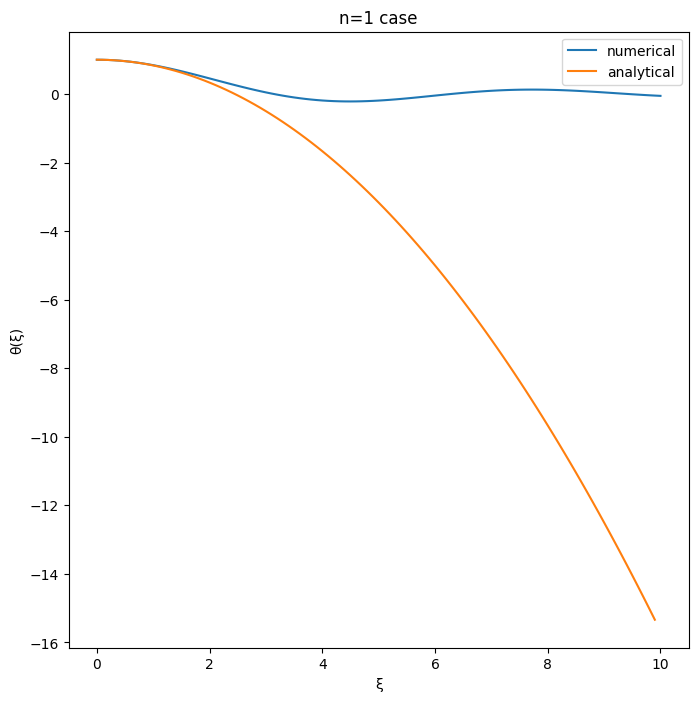

In [11]:
theta_numerical, xi_numerical = RK(10,0.1,1) # usage (xi_max, h, p)

def funcn1(x): return 1.0 - 1.0/6.0 * x*x

xi_analytical = np.arange(0.001,10,0.1) #xi = 0 breaks so  used 0.001
theta_analytical = funcn1(xi_analytical)

plt.figure(figsize=[8,8])
plt.title("n=1 case")
plt.plot(xi_numerical,theta_numerical,label="numerical")
plt.plot(xi_analytical,theta_analytical,label="analytical")
plt.xlabel("ξ")
plt.ylabel("θ(ξ)")
plt.legend()
plt.show()

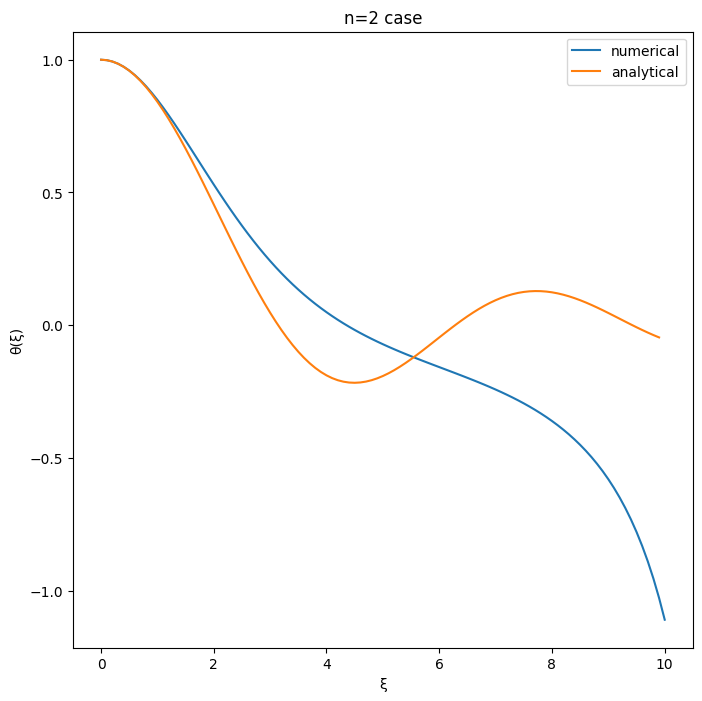

In [12]:
theta_numerical, xi_numerical = RK(10,0.1,2) # usage (xi_max, h, p)

def funcn1(x): return np.sin(x)/x

xi_analytical = np.arange(0.001,10,0.1) #xi = 0 breaks so  used 0.001
theta_analytical = funcn1(xi_analytical)

plt.figure(figsize=[8,8])
plt.title("n=2 case")
plt.plot(xi_numerical,theta_numerical,label="numerical")
plt.plot(xi_analytical,theta_analytical,label="analytical")
plt.xlabel("ξ")
plt.ylabel("θ(ξ)")
plt.legend()
plt.show()

C:\Users\bradl\AppData\Local\Temp\ipykernel_29420\671762161.py:3: RuntimeWarning: invalid value encountered in sqrt
  def funcn1(x): return 1.0/np.sqrt(1.0-(x*x)/3.0)


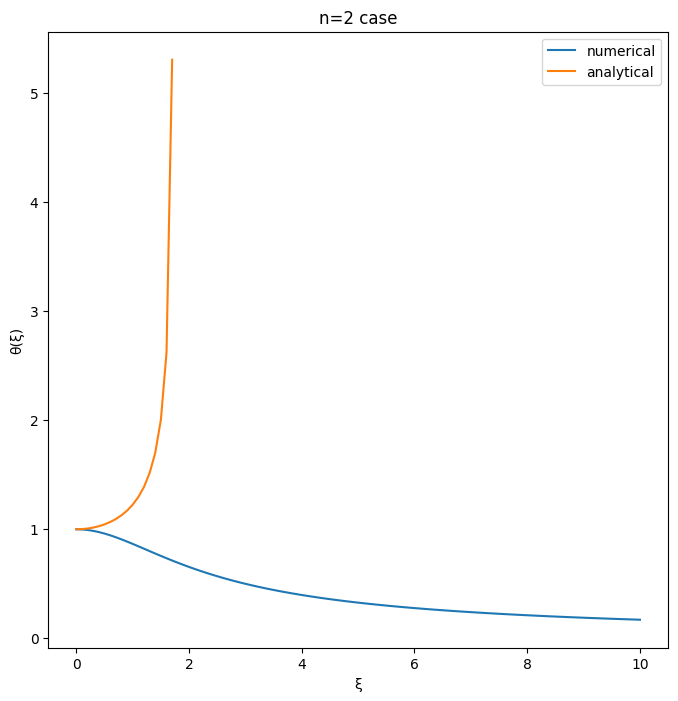

In [13]:
theta_numerical, xi_numerical = RK(10,0.1,5) # usage (xi_max, h, p)

def funcn1(x): return 1.0/np.sqrt(1.0-(x*x)/3.0)

xi_analytical = np.arange(0.001,10,0.1) #xi = 0 breaks so  used 0.001
theta_analytical = funcn1(xi_analytical)

plt.figure(figsize=[8,8])
plt.title("n=2 case")
plt.plot(xi_numerical,theta_numerical,label="numerical")
plt.plot(xi_analytical,theta_analytical,label="analytical")
plt.xlabel("ξ")
plt.ylabel("θ(ξ)")
plt.legend()
plt.show()

Though this does explode that does seem to be the expected behaviour as this is a non-physical solution as the mass is infinite.